In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

In [4]:
df.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [5]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [9]:
df['race_ethnicity']=df['race/ethnicity']
df.drop(columns=['race/ethnicity'],inplace=True)
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race_ethnicity
0,female,bachelor's degree,standard,none,72,72,74,group B
1,female,some college,standard,completed,69,90,88,group C
2,female,master's degree,standard,none,90,95,93,group B
3,male,associate's degree,free/reduced,none,47,57,44,group A
4,male,some college,standard,none,76,78,75,group C


In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
print("Categories in 'gender' variable: ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable: ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable: ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [12]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

print('We have {} numerical features: {}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'parental level of education', 'lunch', 'test preparation course', 'race_ethnicity']


In [13]:
df['Total Score']=df['math score']+df['writing score']+df['reading score']
df['average']=df['Total Score']/3
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race_ethnicity,Total Score,average
0,female,bachelor's degree,standard,none,72,72,74,group B,218,72.666667
1,female,some college,standard,completed,69,90,88,group C,247,82.333333
2,female,master's degree,standard,none,90,95,93,group B,278,92.666667
3,male,associate's degree,free/reduced,none,47,57,44,group A,148,49.333333
4,male,some college,standard,none,76,78,75,group C,229,76.333333


In [14]:
reading_less_20=df[df['reading score']<=20]['average'].count()
writing_less_20=df[df['writing score']<=20]['average'].count()
math_less_20=df[df['math score']<=20]['average'].count()

print(f"Number of Student with less than 20 marks in Maths is {math_less_20}")
print(f"Number of Student with less than 20 marks in Writing is {writing_less_20}")
print(f"Number of Student with less than 20 marks in Reading is {reading_less_20}")

Number of Student with less than 20 marks in Maths is 4
Number of Student with less than 20 marks in Writing is 3
Number of Student with less than 20 marks in Reading is 1


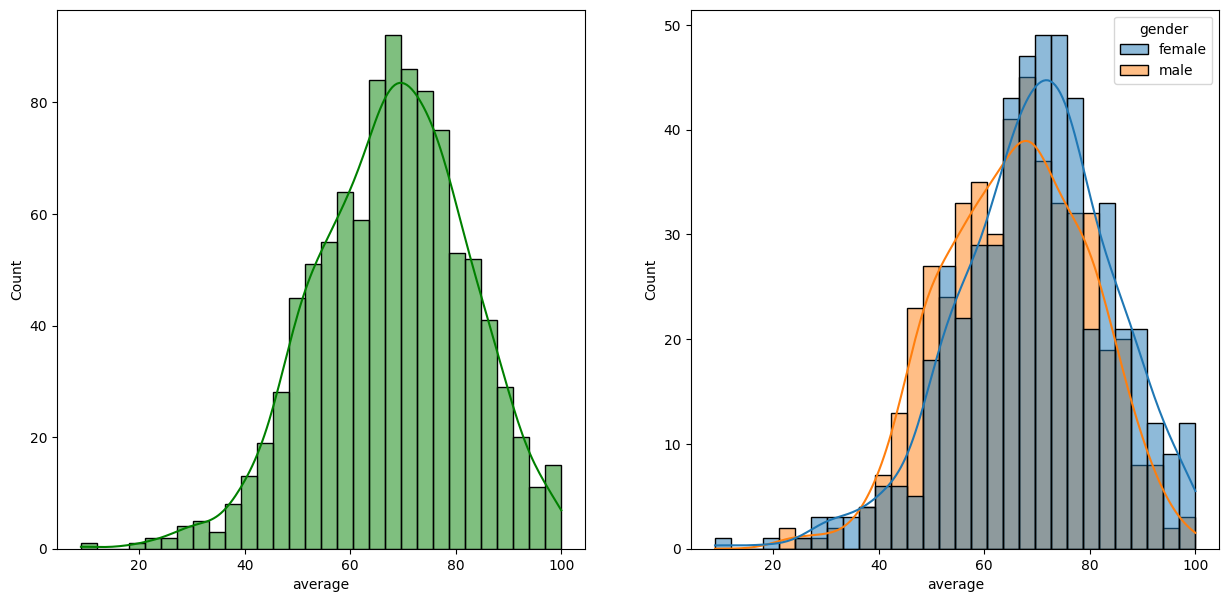

In [21]:
fig, axs= plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average',bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average',bins=30, kde=True, hue='gender')
plt.show()

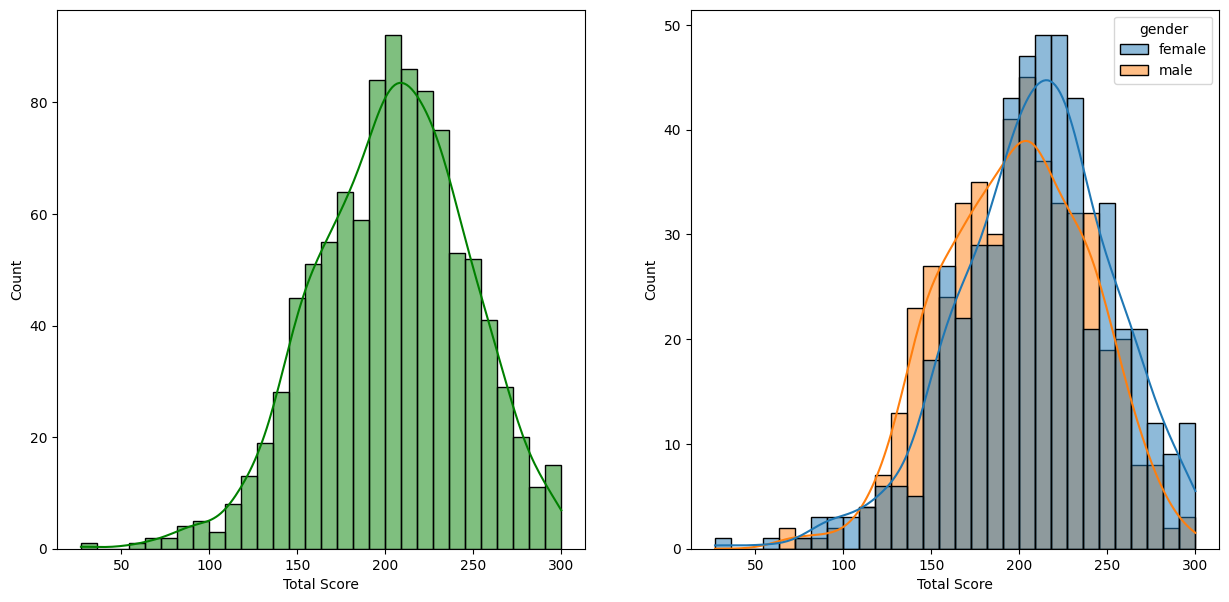

In [22]:
fig, axs= plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Total Score',bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Total Score',bins=30, kde=True, hue='gender')
plt.show()

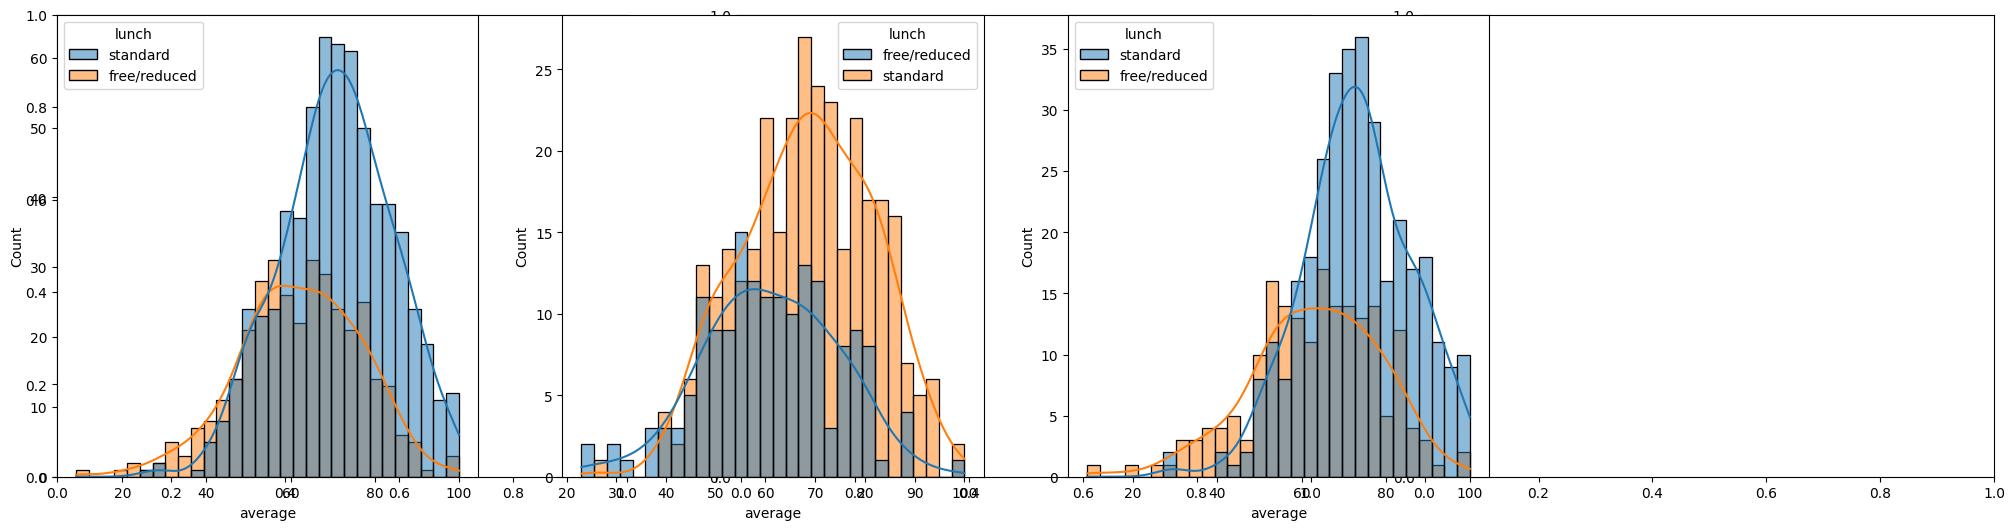

In [23]:
fig, axs= plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average',bins=30, kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'], x='average',bins=30, kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'], x='average',bins=30, kde=True, hue='lunch')
plt.show()

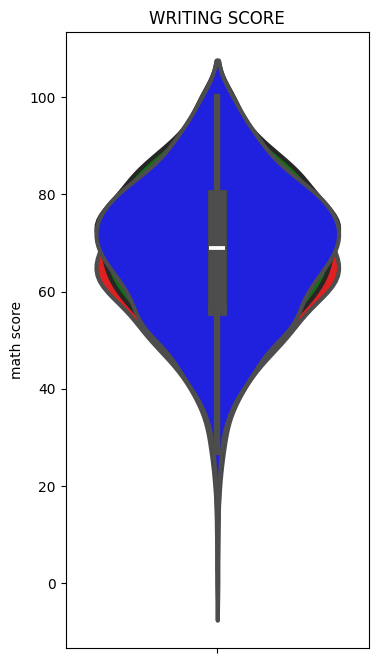

In [25]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("MATH SCORE")
sns.violinplot(y='math score', data=df, color='red',linewidth=3)

plt.subplot(1,4,1)
plt.title("READING SCORE")
sns.violinplot(y='reading score', data=df, color='green',linewidth=3)

plt.subplot(1,4,1)
plt.title("WRITING SCORE")
sns.violinplot(y='writing score', data=df, color='blue',linewidth=3)

plt.show()

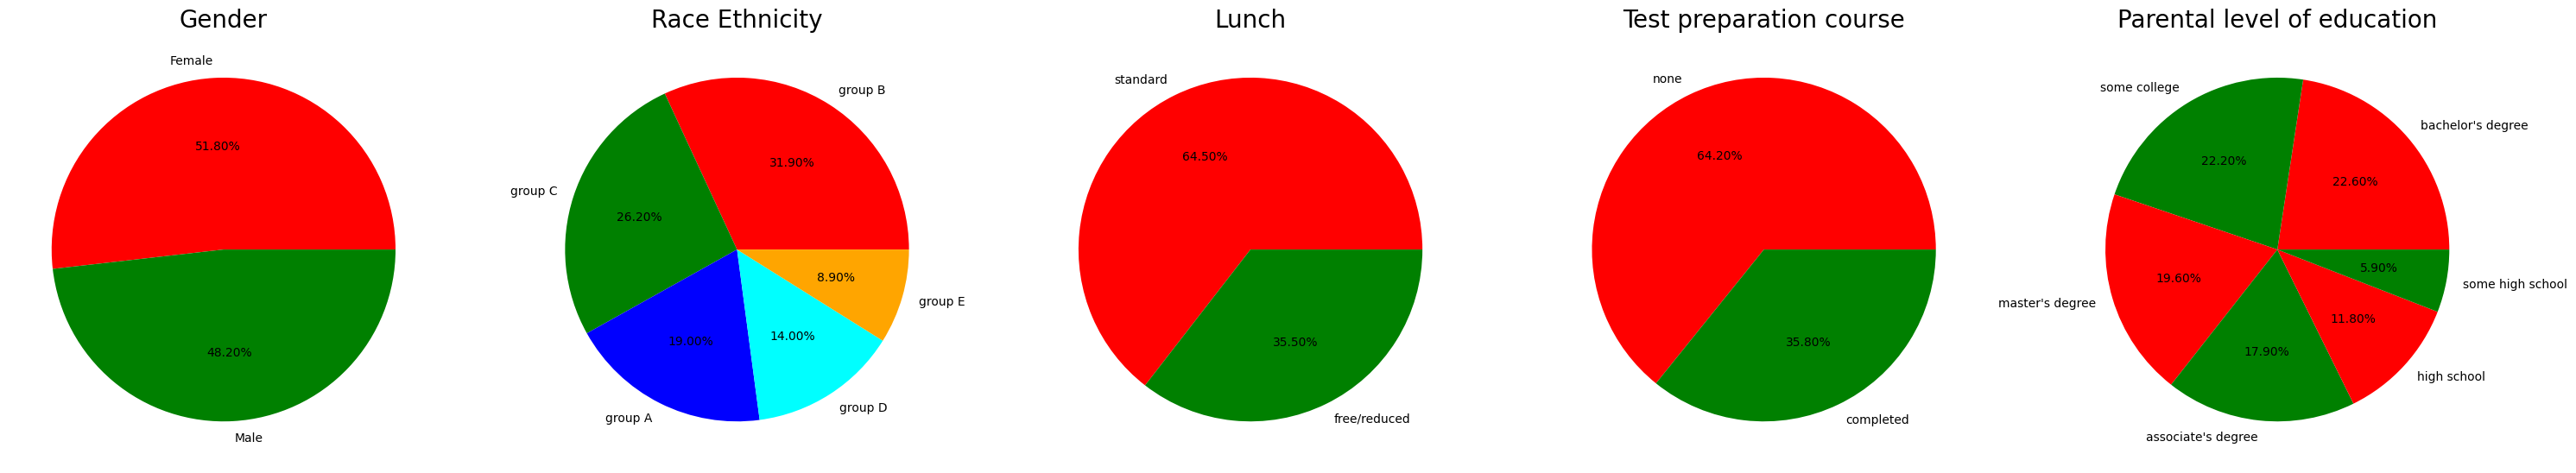

In [36]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='Female','Male'
color=['red','green']
plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels='group B', 'group C', 'group A', 'group D', 'group E'
color=['red','green','blue', 'cyan','orange']
plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Race Ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels='standard', 'free/reduced'
color=['red','green']
plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size=df['test preparation course'].value_counts()
labels= 'none', 'completed'
color=['red','green']
plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Test preparation course',fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size=df['parental level of education'].value_counts()
labels="bachelor's degree", 'some college', "master's degree","associate's degree", 'high school', 'some high school'
color=['red','green']
plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Parental level of education',fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

In [44]:
gender_group=df.groupby('gender').mean(numeric_only=True)
print(gender_group)

        math score  reading score  writing score  Total Score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


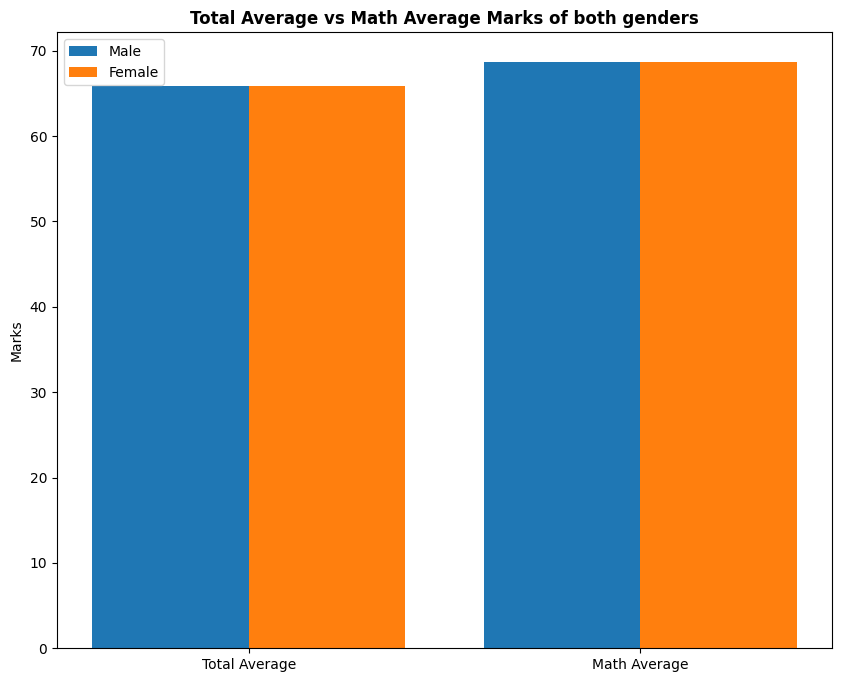

In [45]:
plt.figure(figsize=(10,8))

X=["Total Average", "Math Average"]

females_score=gender_group['average'][0],gender_group['math score'][0]
males_score=gender_group['average'][1],gender_group['math score'][1]

X_axis=np.arange(len(X))

plt.bar(X_axis - 0.2, males_score, 0.4, label='Male')
plt.bar(X_axis + 0.2, males_score, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total Average vs Math Average Marks of both genders", fontweight='bold')
plt.legend()
plt.show()